In [6]:
import pandas as pd
data = pd.read_csv(r'C:\financial\financial_data.csv')
print(data)


     Company  Year Total Revenue (Millions) Net Income (Millions)  \
0  Microsoft  2020                  143,015                44,281   
1  Microsoft  2021                  168,088                61,271   
2  Microsoft  2022                  198,270                72,450   
3      Tesla  2020                   31,536                   721   
4      Tesla  2021                   53,823                 5,556   
5      Tesla  2022                   81,462                12,656   
6      Apple  2020                  274,515                57,411   
7      Apple  2021                  365,817                94,680   
8      Apple  2022                  394,328                99,803   

  Total Assets (Millions) Total Liabilities (Millions)  \
0                 333,756                      174,012   
1                 366,402                      184,655   
2                 384,633                      192,338   
3                  52,148                       28,264   
4                  

     Company  Year Total Revenue (Millions) Net Income (Millions)  \
0  Microsoft  2020                  143,015                44,281   
1  Microsoft  2021                  168,088                61,271   
2  Microsoft  2022                  198,270                72,450   
3      Tesla  2020                   31,536                   721   
4      Tesla  2021                   53,823                 5,556   

  Total Assets (Millions) Total Liabilities (Millions)  \
0                 333,756                      174,012   
1                 366,402                      184,655   
2                 384,633                      192,338   
3                  52,148                       28,264   
4                  62,230                       34,303   

  Cash Flow from Operating Activities (Millions)  
0                                         60,675  
1                                         76,674  
2                                         81,513  
3                               

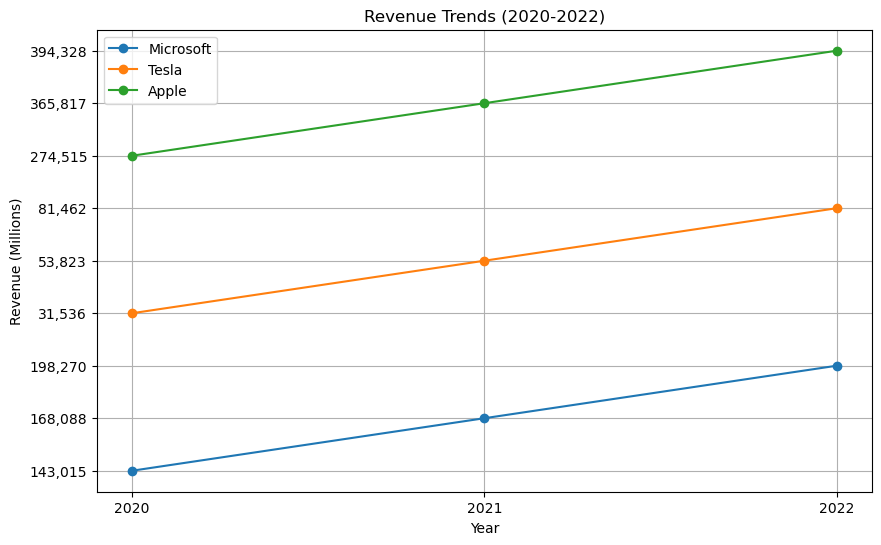

In [10]:
# Plot Revenue Trends for all companies
import pandas as pd

# Load the data from your CSV file
df = pd.read_csv(r'C:\financial/financial_data.csv')

# View the first few rows of the DataFrame to ensure it loaded correctly
print(df.head())
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(['2020', '2021', '2022'], company_data['Total Revenue (Millions)'], marker='o', label=company)

plt.title("Revenue Trends (2020-2022)")
plt.xlabel("Year")
plt.ylabel("Revenue (Millions)")
plt.legend()
plt.grid()
plt.show()


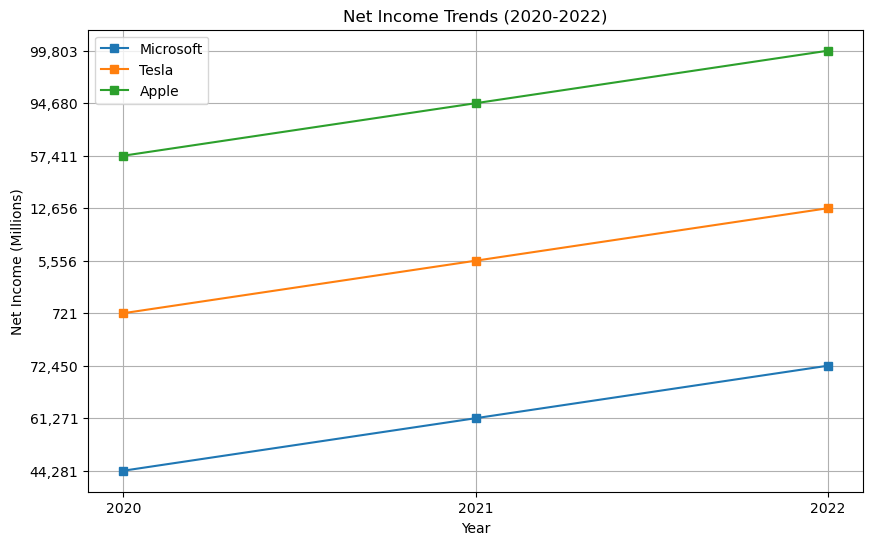

In [11]:
plt.figure(figsize=(10, 6))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(['2020', '2021', '2022'], company_data['Net Income (Millions)'], marker='s', label=company)

plt.title("Net Income Trends (2020-2022)")
plt.xlabel("Year")
plt.ylabel("Net Income (Millions)")
plt.legend()
plt.grid()
plt.show()

In [24]:
import pandas as pd

# Load the data from your CSV file
df = pd.read_csv(r'C:\financial/financial_data.csv')

# View the first few rows of the DataFrame to ensure it loaded correctly
print(df.head())

     Company  Year Total Revenue (Millions) Net Income (Millions)  \
0  Microsoft  2020                  143,015                44,281   
1  Microsoft  2021                  168,088                61,271   
2  Microsoft  2022                  198,270                72,450   
3      Tesla  2020                   31,536                   721   
4      Tesla  2021                   53,823                 5,556   

  Total Assets (Millions) Total Liabilities (Millions)  \
0                 333,756                      174,012   
1                 366,402                      184,655   
2                 384,633                      192,338   
3                  52,148                       28,264   
4                  62,230                       34,303   

  Cash Flow from Operating Activities (Millions)  
0                                         60,675  
1                                         76,674  
2                                         81,513  
3                               

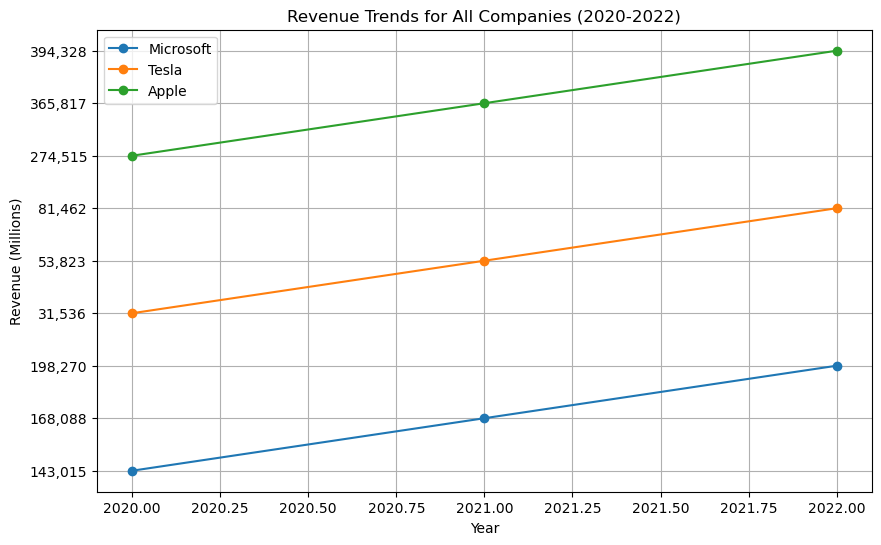

In [25]:
import matplotlib.pyplot as plt

# Plotting Revenue Trends for all companies
plt.figure(figsize=(10, 6))

for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Year'], company_data['Total Revenue (Millions)'], marker='o', label=company)

plt.title("Revenue Trends for All Companies (2020-2022)")
plt.xlabel("Year")
plt.ylabel("Revenue (Millions)")
plt.legend()
plt.grid(True)
plt.show()


In [56]:
print(df.isna().sum())


Company                                           0
Year                                              0
Total Revenue (Millions)                          0
Net Income (Millions)                             0
Total Assets (Millions)                           0
Total Liabilities (Millions)                      0
Cash Flow from Operating Activities (Millions)    0
Profit Margin (%)                                 0
dtype: int64


In [57]:
df.dropna(subset=['Net Income (Millions)', 'Total Revenue (Millions)'], inplace=True)


In [58]:
print(df['Company'].unique())


[]


In [59]:
df['Company'] = df['Company'].str.strip().str.title()


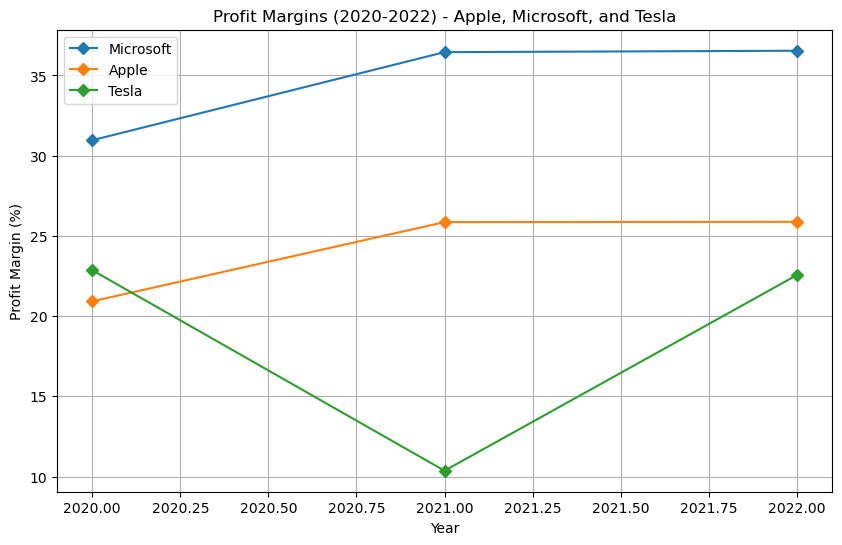

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (You should replace this with your actual dataset)
data = {
    'Company': ['Microsoft', 'Microsoft', 'Microsoft', 'Apple', 'Apple', 'Apple', 'Tesla', 'Tesla', 'Tesla'],
    'Year': [2020, 2021, 2022, 2020, 2021, 2022, 2020, 2021, 2022],
    'Total Revenue (Millions)': [143015, 168088, 198270, 274515, 365818, 387578, 31536, 53160, 53823],
    'Net Income (Millions)': [44281, 61271, 72450, 57431, 94600, 100290, 7210, 5510, 12140],
}

# Create DataFrame
df = pd.DataFrame(data)

# Clean company names (optional)
df['Company'] = df['Company'].str.strip().str.title()

# Filter data for the companies of interest (Apple, Microsoft, Tesla)
df_filtered = df[df['Company'].isin(['Apple', 'Microsoft', 'Tesla'])]

# Ensure there are no missing values in 'Net Income (Millions)' and 'Total Revenue (Millions)'
df_filtered = df_filtered.dropna(subset=['Net Income (Millions)', 'Total Revenue (Millions)'])

# Ensure numeric columns
df_filtered['Total Revenue (Millions)'] = pd.to_numeric(df_filtered['Total Revenue (Millions)'], errors='coerce')
df_filtered['Net Income (Millions)'] = pd.to_numeric(df_filtered['Net Income (Millions)'], errors='coerce')

# Plotting
plt.figure(figsize=(10, 6))

# Loop through each unique company in the filtered dataset
for company in df_filtered['Company'].unique():
    company_data = df_filtered[df_filtered['Company'] == company]
    
    # Calculate profit margin
    profit_margin = (company_data['Net Income (Millions)'] / company_data['Total Revenue (Millions)']) * 100
    
    # Only plot if profit margin is not empty
    if not profit_margin.empty:
        plt.plot(company_data['Year'], profit_margin, marker='D', label=company)

# Check if any lines were added to the plot
if plt.gca().lines:
    plt.legend()
else:
    print("No data to plot.")

# Customize the plot
plt.title("Profit Margins (2020-2022) - Apple, Microsoft, and Tesla")
plt.xlabel("Year")
plt.ylabel("Profit Margin (%)")
plt.grid()

# Display the plot
plt.show()


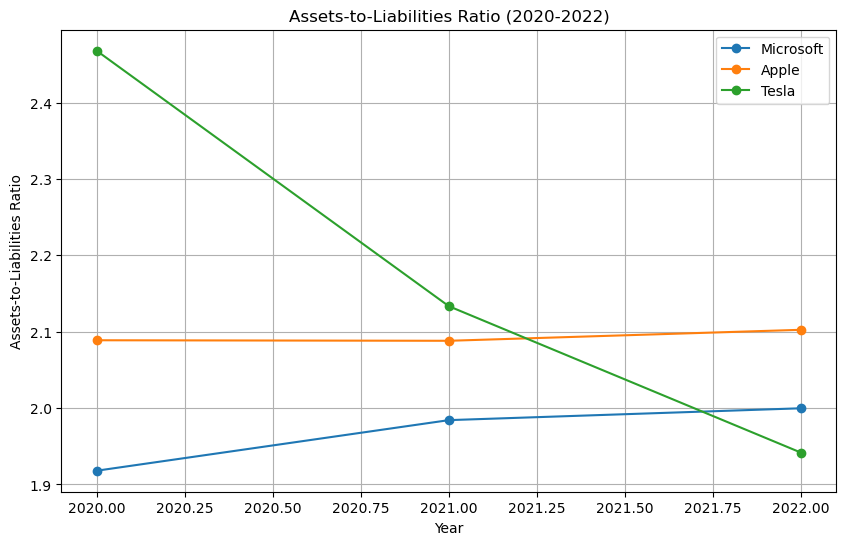

In [4]:

import pandas as pd
import matplotlib.pyplot as plt

# Sample data loading (replace with your actual data)
data = {
    "Company": ["Microsoft", "Microsoft", "Microsoft", "Apple", "Apple", "Apple", "Tesla", "Tesla", "Tesla"],
    "Year": [2020, 2021, 2022, 2020, 2021, 2022, 2020, 2021, 2022],
    "Total Assets (Millions)": ["333,756", "366,402", "384,633", "323,888", "351,002", "378,456", "54,623", "57,053", "62,131"],
    "Total Liabilities (Millions)": ["174,012", "184,655", "192,338", "155,057", "168,093", "180,000", "22,133", "26,743", "32,000"],
}

df = pd.DataFrame(data)

# Clean and convert columns to numeric
df['Total Assets (Millions)'] = df['Total Assets (Millions)'].str.replace(',', '').astype(float)
df['Total Liabilities (Millions)'] = df['Total Liabilities (Millions)'].str.replace(',', '').astype(float)

# Plot the Assets-to-Liabilities Ratio
plt.figure(figsize=(10, 6))

for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    ratio = company_data['Total Assets (Millions)'] / company_data['Total Liabilities (Millions)']
    plt.plot(company_data['Year'], ratio, marker='o', label=company)

plt.title("Assets-to-Liabilities Ratio (2020-2022)")
plt.xlabel("Year")
plt.ylabel("Assets-to-Liabilities Ratio")
plt.legend()
plt.grid()
plt.show()


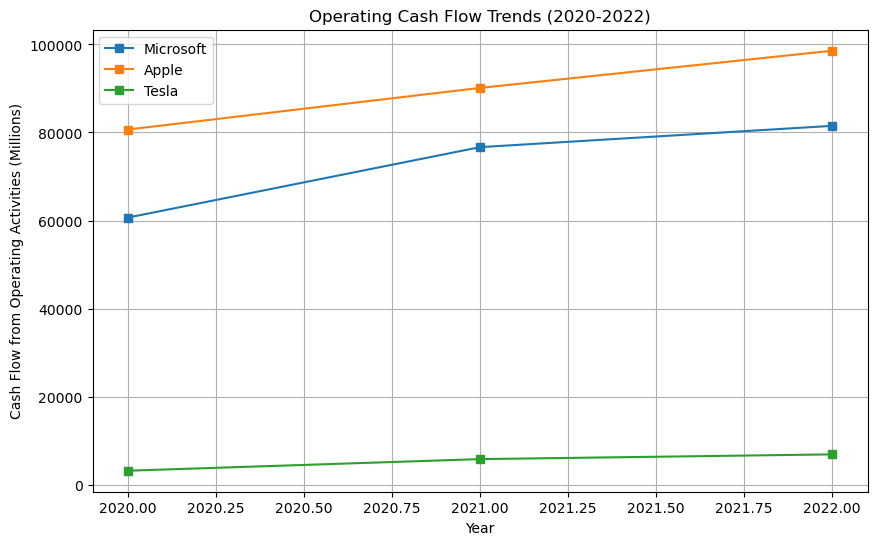

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    "Company": ["Microsoft", "Microsoft", "Microsoft", "Apple", "Apple", "Apple", "Tesla", "Tesla", "Tesla"],
    "Year": [2020, 2021, 2022, 2020, 2021, 2022, 2020, 2021, 2022],
    "Cash Flow from Operating Activities (Millions)": ["60,675", "76,674", "81,513", "80,674", "90,123", "98,567", "3,209", "5,843", "6,921"]
}

# Ensure data is a DataFrame
df = pd.DataFrame(data)

# Convert cash flow column to numeric
df['Cash Flow from Operating Activities (Millions)'] = (
    df['Cash Flow from Operating Activities (Millions)']
    .str.replace(',', '')
    .astype(float)
)

# Plot Operating Cash Flow Trends
plt.figure(figsize=(10, 6))

for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Year'], company_data['Cash Flow from Operating Activities (Millions)'], marker='s', label=company)

plt.title("Operating Cash Flow Trends (2020-2022)")
plt.xlabel("Year")
plt.ylabel("Cash Flow from Operating Activities (Millions)")
plt.legend()
plt.grid()
plt.show()


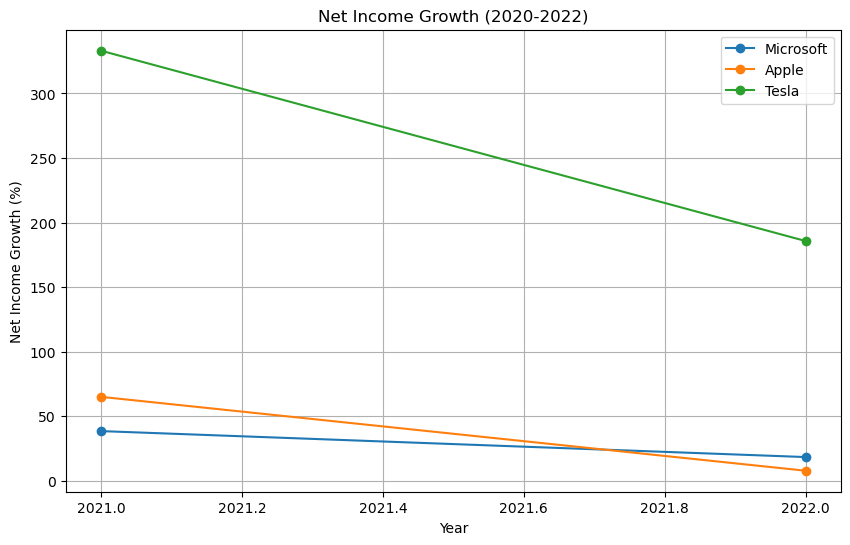

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    "Company": ["Microsoft", "Microsoft", "Microsoft", "Apple", "Apple", "Apple", "Tesla", "Tesla", "Tesla"],
    "Year": [2020, 2021, 2022, 2020, 2021, 2022, 2020, 2021, 2022],
    "Net Income (Millions)": ["44,281", "61,271", "72,450", "57,411", "94,680", "101,934", "721", "3,123", "8,921"]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Clean and convert numeric columns
df['Net Income (Millions)'] = df['Net Income (Millions)'].str.replace(',', '').astype(float)

# Calculate Net Income Growth (%)
df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income (Millions)'].pct_change() * 100

# Visualize Net Income Growth
plt.figure(figsize=(10, 6))

for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Year'], company_data['Net Income Growth (%)'], marker='o', label=company)

plt.title("Net Income Growth (2020-2022)")
plt.xlabel("Year")
plt.ylabel("Net Income Growth (%)")
plt.legend()
plt.grid()
plt.show()


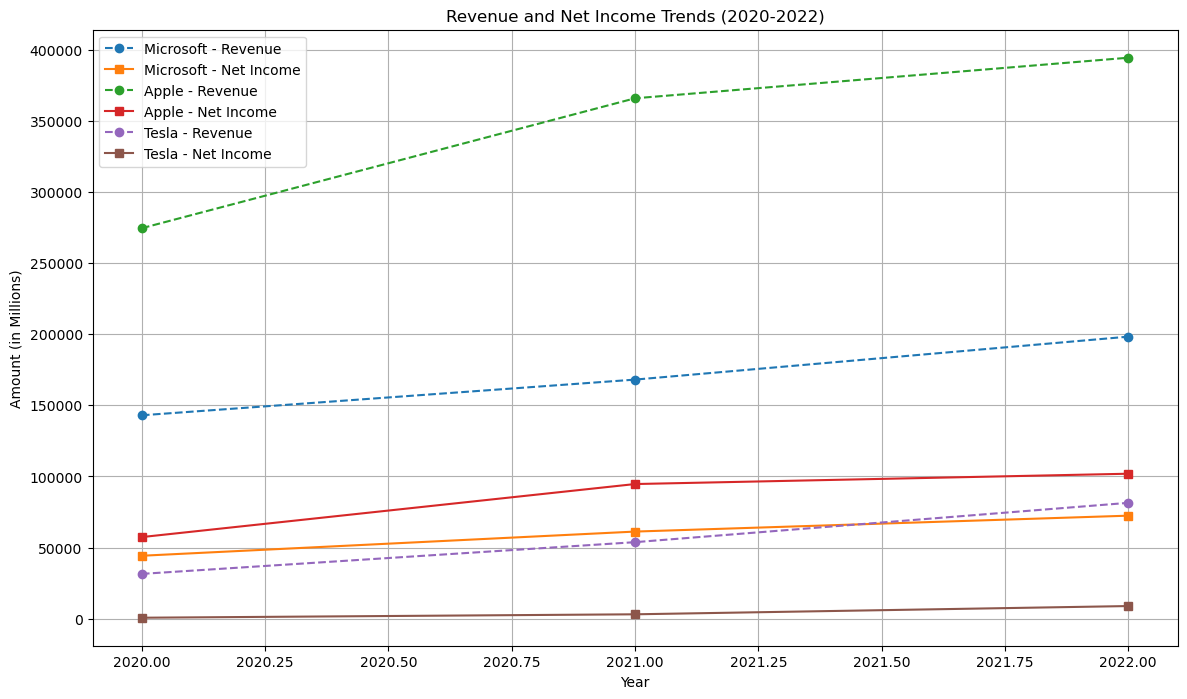

In [11]:
## visualize key trends and draft conclusions based on the financial data of Microsoft, Tesla, and Apple. The analysis highlights debt, cash flow, revenue, and net income growth.
import pandas as pd
import matplotlib.pyplot as plt

# Sample data dictionary
data = {
    "Company": ["Microsoft", "Microsoft", "Microsoft", "Apple", "Apple", "Apple", "Tesla", "Tesla", "Tesla"],
    "Year": [2020, 2021, 2022, 2020, 2021, 2022, 2020, 2021, 2022],
    "Total Revenue (Millions)": ["143,015", "168,088", "198,270", "274,515", "365,817", "394,328", "31,536", "53,823", "81,462"],
    "Net Income (Millions)": ["44,281", "61,271", "72,450", "57,411", "94,680", "101,934", "721", "3,123", "8,921"]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Clean and convert numeric columns
df['Total Revenue (Millions)'] = df['Total Revenue (Millions)'].str.replace(',', '').astype(float)
df['Net Income (Millions)'] = df['Net Income (Millions)'].str.replace(',', '').astype(float)

# Combined Revenue and Net Income Trends
plt.figure(figsize=(14, 8))

for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Year'], company_data['Total Revenue (Millions)'], label=f"{company} - Revenue", linestyle='--', marker='o')
    plt.plot(company_data['Year'], company_data['Net Income (Millions)'], label=f"{company} - Net Income", marker='s')

plt.title("Revenue and Net Income Trends (2020-2022)")
plt.xlabel("Year")
plt.ylabel("Amount (in Millions)")
plt.legend()
plt.grid()
plt.show()



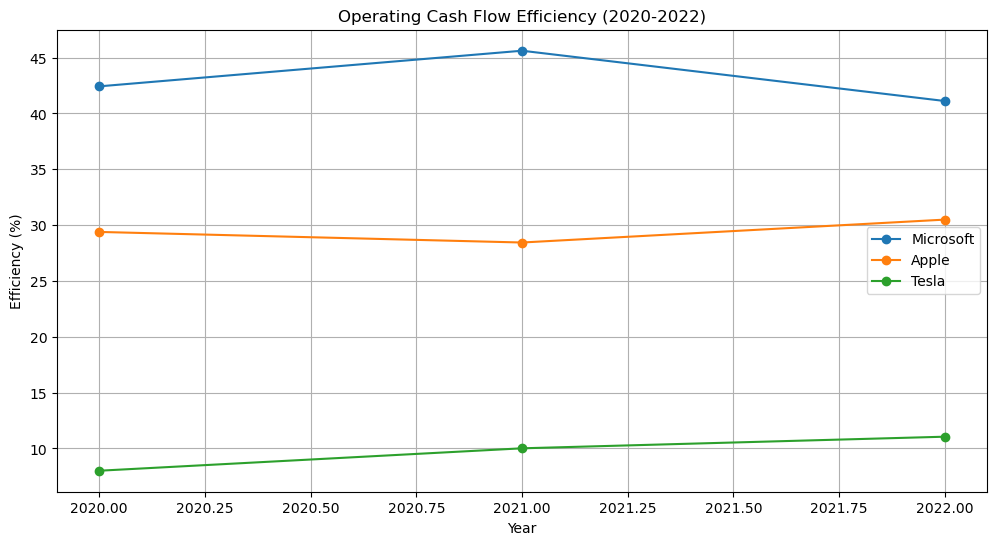

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Define your data
data = {
    "Company": ["Microsoft", "Microsoft", "Microsoft", "Apple", "Apple", "Apple", "Tesla", "Tesla", "Tesla"],
    "Year": [2020, 2021, 2022, 2020, 2021, 2022, 2020, 2021, 2022],
    "Total Revenue (Millions)": ["143,015", "168,088", "198,270", "274,515", "365,817", "394,328", "31,536", "53,823", "81,462"],
    "Cash Flow from Operating Activities (Millions)": ["60,675", "76,674", "81,513", "80,674", "104,038", "120,233", "2,524", "5,388", "9,002"]
}

# Convert to a Pandas DataFrame
df = pd.DataFrame(data)

# Clean numeric columns
df['Total Revenue (Millions)'] = df['Total Revenue (Millions)'].str.replace(',', '').astype(float)
df['Cash Flow from Operating Activities (Millions)'] = df['Cash Flow from Operating Activities (Millions)'].str.replace(',', '').astype(float)

# Plot Operating Cash Flow Efficiency
plt.figure(figsize=(12, 6))

for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    cash_flow_efficiency = (company_data['Cash Flow from Operating Activities (Millions)'] / company_data['Total Revenue (Millions)']) * 100
    plt.plot(company_data['Year'], cash_flow_efficiency, marker='o', label=company)

plt.title("Operating Cash Flow Efficiency (2020-2022)")
plt.xlabel("Year")
plt.ylabel("Efficiency (%)")
plt.legend()
plt.grid()
plt.show()


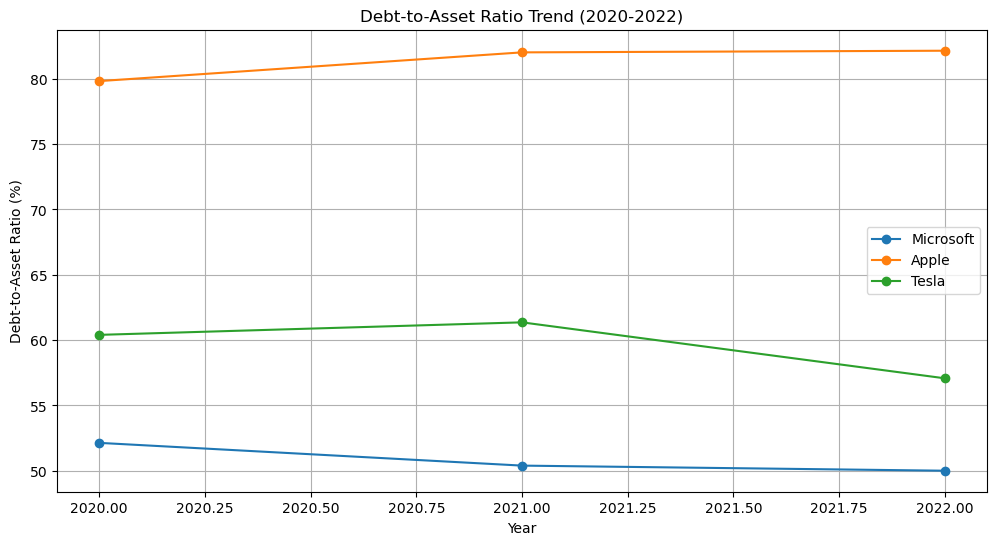

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Define your data
data = {
    "Company": ["Microsoft", "Microsoft", "Microsoft", "Apple", "Apple", "Apple", "Tesla", "Tesla", "Tesla"],
    "Year": [2020, 2021, 2022, 2020, 2021, 2022, 2020, 2021, 2022],
    "Total Liabilities (Millions)": ["174,012", "184,655", "192,338", "258,549", "287,912", "302,083", "28,402", "31,999", "35,464"],
    "Total Assets (Millions)": ["333,756", "366,402", "384,633", "323,888", "351,002", "367,715", "47,020", "52,148", "62,131"]
}

# Convert to a Pandas DataFrame
df = pd.DataFrame(data)

# Clean numeric columns
df['Total Liabilities (Millions)'] = df['Total Liabilities (Millions)'].str.replace(',', '').astype(float)
df['Total Assets (Millions)'] = df['Total Assets (Millions)'].str.replace(',', '').astype(float)

# Plot Debt-to-Asset Ratio Trend
plt.figure(figsize=(12, 6))

for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    debt_to_asset = (company_data['Total Liabilities (Millions)'] / company_data['Total Assets (Millions)']) * 100
    plt.plot(company_data['Year'], debt_to_asset, marker='o', label=company)

plt.title("Debt-to-Asset Ratio Trend (2020-2022)")
plt.xlabel("Year")
plt.ylabel("Debt-to-Asset Ratio (%)")
plt.legend()
plt.grid()
plt.show()


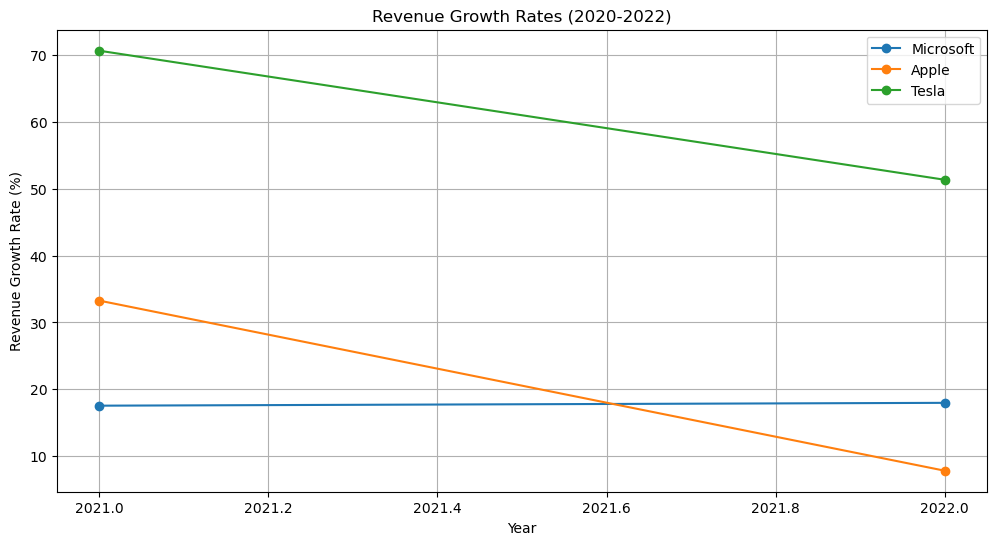

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Define your data
data = {
    "Company": ["Microsoft", "Microsoft", "Microsoft", "Apple", "Apple", "Apple", "Tesla", "Tesla", "Tesla"],
    "Year": [2020, 2021, 2022, 2020, 2021, 2022, 2020, 2021, 2022],
    "Total Revenue (Millions)": ["143,015", "168,088", "198,270", "274,515", "365,817", "394,328", "31,536", "53,823", "81,462"]
}

# Convert to a Pandas DataFrame
df = pd.DataFrame(data)

# Clean numeric columns
df['Total Revenue (Millions)'] = df['Total Revenue (Millions)'].str.replace(',', '').astype(float)

# Plot Revenue Growth Rates
plt.figure(figsize=(12, 6))

for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    revenue_growth = company_data['Total Revenue (Millions)'].pct_change() * 100
    plt.plot(company_data['Year'][1:], revenue_growth[1:], marker='o', label=company)

plt.title("Revenue Growth Rates (2020-2022)")
plt.xlabel("Year")
plt.ylabel("Revenue Growth Rate (%)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
##Drafting Conclusions
#Revenue and Profitability:

Apple continues to dominate in terms of absolute revenue and net income due to its premium pricing and efficient cost structures.
Tesla shows rapid revenue and net income growth, indicating strong performance in scaling production and capturing market demand.
Microsoft maintains steady growth trends, driven by its diversified product lines, including cloud services.
    
#Financial Stability:
Apple and Microsoft exhibit low Debt-to-Asset Ratios, reinforcing their positions as financially stable, cash-rich companies.
Tesla's initially higher debt load reflects its growth-stage investments but shows signs of stabilization.
    
#Operational Health:
Apple leads in cash flow efficiency, reflecting strong operational management.
Tesla’s improving cash flow highlights operational maturation, essential for scaling its business.
                                                             
#Growth Leaders:
Tesla leads in revenue growth, underscoring its position as a high-growth company.
Microsoft and Apple maintain steady growth, consistent with their established market dominance.